<img src="https://user-images.strikinglycdn.com/res/hrscywv4p/image/upload/c_limit,fl_lossy,h_300,w_300,f_auto,q_auto/1266110/Logo_wzxi0f.png" style="float: left; margin: 20px; height: 55px">

**The future starts today, not tomorrow - [John Paul II](https://en.wikipedia.org/wiki/Pope_John_Paul_II)**

# Chapter 5: Modeling distributions

The distributions we have used so far are called **empirical distributions** because they are based on empirical observations, which are necessarily finite samples.

The alternative is an **analytic distribution**, which is characterized by a CDF that is a mathematical function. Analytic distributions can be used to model empirical distributions. In this context, a model is a simplification
that leaves out unneeded details. This chapter presents common analytic distributions and uses them to model data from a variety of sources.

## The exponential distribution

I’ll start with the exponential distribution because it is relatively simple.The CDF of the exponential distribution is:

![alt text](Resources/Think_Stats/notebookpics/exponential_formula.png "Title")

The parameter, λ, determines the shape of the distribution.

Draw and compare the distribution for the values of the λ = 0.5, 1 and 2:

In [31]:
from Resources.Think_Stats.Thinkstats2 import analytic
from Resources.Think_Stats.Thinkstats2 import thinkstats2
from Resources.Think_Stats.Thinkstats2 import thinkplot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [32]:
def cdf_point_five(value):
    s = 1 - (math.exp(1)**(-0.5*float(value)))
    return s
def cdf_one(value):
    s = 1 - (math.exp(1)**(-1*float(value)))
    return s
def cdf_two(value):
    s = 1 - (math.exp(1)**(-2*float(value)))
    return s

In [33]:
y_point_five = []
y_one = []
y_two = []
for x in list(range(1,21)):
    y_point_five.append(cdf_point_five(x))
    y_one.append(cdf_one(x))
    y_two.append(cdf_two(x))

<function matplotlib.pyplot.show(close=None, block=None)>

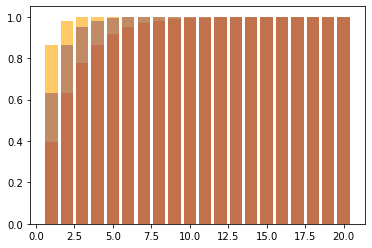

In [42]:
plt.bar(x=list(range(1,21)), height=y_point_five, alpha = 0.6, color = 'red')
plt.bar(x=list(range(1,21)), height=y_one, alpha = 0.6, color = 'blue')
plt.bar(x=list(range(1,21)), height=y_two, alpha = 0.6, color = 'orange')
plt.show

In the real world, exponential distributions come up when we look at a series of events and measure the times between events, called interarrival times. If the events are equally likely to occur at any time, the distribution of **interarrival times** tends to look like an exponential distribution.

As an example, we will look at the interarrival time of births. On December 18, 1997, 44 babies were born in a hospital in Brisbane, Australia. The time of birth for all 44 babies was reported in the local paper; the complete dataset is in a file called `babyboom.dat`, in the `ThinkStats2` repository.

In [35]:
df = analytic.ReadBabyBoom(filename='Resources/Think_Stats/Thinkstats2/babyboom.dat')
diffs = df.minutes.diff()

In [108]:
medias = []
for z in list(range(0,10100)):
    e = diffs.sample(2).mean()
    medias.append(e)

In [104]:
np.mean(diffs)

33.25581395348837

In [109]:
np.mean(medias)

33.368168316831685

(array([  8.,  47., 106., 174., 208., 191., 159.,  77.,  28.,  12.]),
 array([19.89473684, 22.64210526, 25.38947368, 28.13684211, 30.88421053,
        33.63157895, 36.37894737, 39.12631579, 41.87368421, 44.62105263,
        47.36842105]),
 <BarContainer object of 10 artists>)

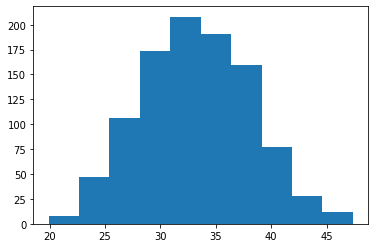

In [102]:
plt.hist(medias)

In [95]:
e = diffs.sample(20)
e
e.mean()

1      59.0
2      14.0
22      1.0
36     19.0
40     19.0
37     27.0
16      4.0
9     157.0
19     47.0
30     18.0
5      68.0
8       9.0
39     13.0
21     61.0
31     29.0
18     36.0
14     86.0
3      37.0
11     37.0
0       NaN
Name: minutes, dtype: float64

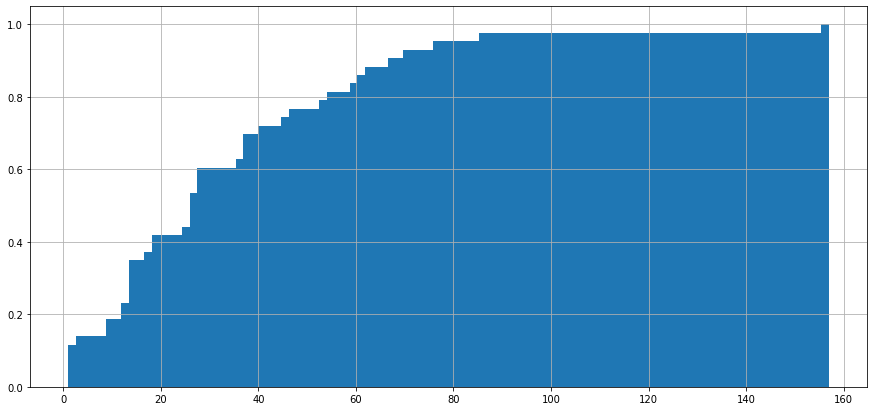

In [90]:
diffs_serie = pd.Series(diffs)

plt.figure(figsize = (15,7))
diffs_serie.hist(cumulative = True, density = 1, bins = 100)
plt.show()

`ReadBabyBoom` reads the data file and returns a DataFrame with columns `time`, `sex`, `weight_g`, and `minutes`, where minutes is time of birth converted to minutes since midnight.

`diffs` is the difference between consecutive birth times, and `cdf` is the distribution of these interarrival times. 

Plot the CDF of the diff distribution:

In [36]:
# Code here

Compare it with the result of the `thinkstas2` module:

In [37]:
# Code here

This graph shows the CDF. It seems to have the general shape of an exponential distribution, but how can we
tell?

One way is to plot the **complementary CDF**, which is 1 − CDF(x), on a log-y scale. For data from an exponential distribution, the result is a straight line. Let’s see why that works.

If you plot the complementary CDF (CCDF) of a dataset that you think is exponential, you expect to see a function like:

![alt text](Resources/Think_Stats/notebookpics/complementary_exponential.png "Title")

Taking the log of both sides yields:

![alt text](Resources/Think_Stats/notebookpics/complementary_exp.png "Title")

So on a log-y scale the CCDF is a straight line with slope −λ. knowing that the complementary is 1 - x would you be able to plot the complementary CDF of the interrarival times? (remember that your y axis need to be in logarithmic scale)

In [38]:
#following code will probably be useful
xs, ps = cdf.Render()

NameError: name 'cdf' is not defined

In [ ]:
# Code here


Here’s how we can generate a plot like that with `thinkstats`.

In [ ]:
plt.figure(figsize = (15,7))
thinkplot.Cdf(cdf, complement=True)
thinkplot.Show(xlabel='minutes',
               ylabel='CCDF',
               yscale='log')

With the argument `complement=True`, `thinkplot.Cdf` computes the complementary CDF before plotting. And with `scale=’log’`, `thinkplot.Show` sets the y axis to a logarithmic scale.

The result is not exactly straight, which indicates that the exponential distribution is not a perfect model for this data. Most likely the underlying assumption —that a birth is equally likely at any time of day— is not exactly true. Nevertheless, it might be reasonable to model this dataset with an exponential distribution. With that simplification, we can summarize the distribution with a single parameter.

**The parameter, λ, can be interpreted as a rate; that is, the number of events that occur, on average, in a unit of time.** In this example, 44 babies are born in 24 hours, so the rate is λ = 0.0306 births per minute. The mean of an exponential distribution is 1/λ, so the mean time between births is 32.7 minutes.

## The normal distribution

The normal distribution, also called Gaussian, is commonly used because it describes many phenomena, at least approximately. It turns out that there is a good reason for its ubiquity, which we will get to in chapter 14.

The normal distribution is characterized by two parameters: the mean, μ, and standard deviation σ. The normal distribution with μ = 0 and σ = 1 is called the standard normal distribution. Its CDF is defined by an integral that does not have a closed form solution, but there are algorithms that evaluate it efficiently. One of them is provided by SciPy: scipy.stats.norm is an object that represents a normal distribution; it provides a method, cdf, that evaluates the standard normal CDF:

In [44]:
import scipy.stats

In [45]:
scipy.stats.norm.cdf(0)

0.5

This result is correct: the median of the standard normal distribution is 0 (the same as the mean), and half of the values fall below the median, so CDF(0) is 0.5.

`norm.cdf` takes optional parameters: `loc`, which specifies the mean, and `scale`, which specifies the standard deviation.

Try to calculate and plot with `scipy.stats.norm` the distributions with:

In [46]:
mus = [1.0, 2.0, 3.0]
sigmas = [0.5, 0.4, 0.3]

`thinkstats2` makes this function a little easier to use by providing `RenderNormalCdf`, which takes parameters mu and sigma and evaluates the CDF at x.

In [ ]:
scipy.stats.norm.cdf(i, loc = mu, scale = l)

In [ ]:
scipy.stats.norm.cdf(i = 1 to a 100, loc = mu(mean), scale(sigma) = 1)

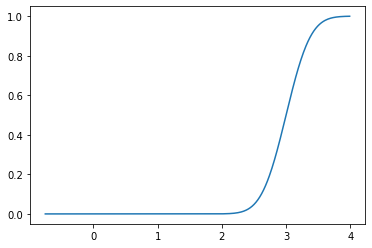

In [89]:
y_1 = []

for j, x in enumerate(list(np.arange(-0.75, 4, 0.01))):
    for y, z in zip(mus, sigmas):
        r = scipy.stats.norm.cdf(x, loc = y, scale = z)
    y_1.append(r)
    x = np.arange(-0.75, 4, 0.01)
plt.plot(x, y_1)
plt.show()

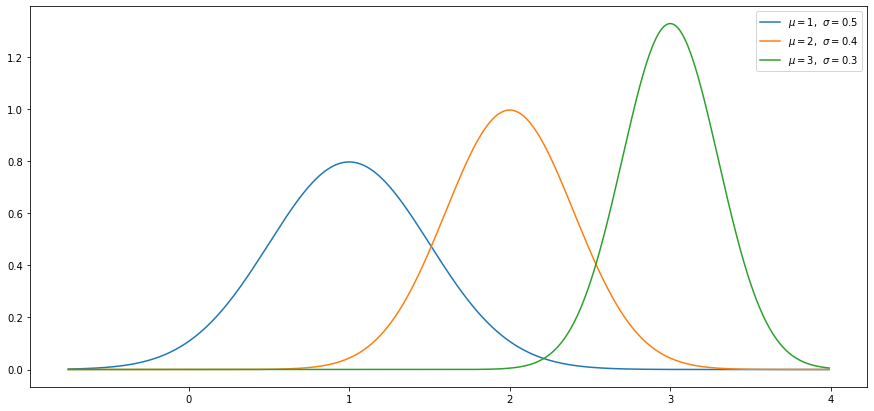

In [82]:
plt.figure(figsize = (15,7))
for mu, l in [[1,0.5],[2,0.4],[3,0.3]]:
    list0 = []
    x = np.arange(-0.75, 4, 0.01)
    for i in x:
        list0.append(scipy.stats.norm.pdf(i, loc = mu, scale = l))
    plt.plot(x, list0, label = f'$\mu={mu}$,  $\sigma={l}$')

plt.legend()
plt.show()

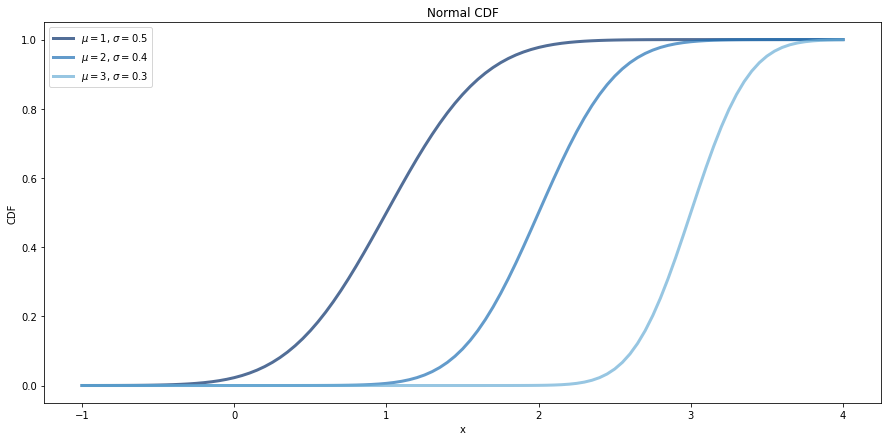

In [47]:
plt.figure(figsize = (15,7))
thinkplot.PrePlot(3)

mus = [1.0, 2.0, 3.0]
sigmas = [0.5, 0.4, 0.3]
for mu, sigma in zip(mus, sigmas):
    xs, ps = thinkstats2.RenderNormalCdf(mu=mu, sigma=sigma, 
                                               low=-1.0, high=4.0)
    label = r'$\mu=%g$, $\sigma=%g$' % (mu, sigma)
    thinkplot.Plot(xs, ps, label=label)

thinkplot.Config(title='Normal CDF', xlabel='x', ylabel='CDF',
                 loc='upper left')

In the previous chapter we looked at the distribution of birth weights in the `NSFG`. Plot again the CDF of this distribution:

In [ ]:
from Resources.Think_Stats.Thinkstats2 import nsfg

preg = nsfg.ReadFemPreg(dct_file='Resources/Think_Stats/Thinkstats2/2002FemPreg.dct',
                      dat_file='Resources/Think_Stats/Thinkstats2/2002FemPreg.dat.gz',
                       clean = True)

In [ ]:
# Code here

Calculate now the mean and standart deviation of this distribution

In [ ]:
# Code here

Base on this mean and standart deviation statistis create the CDF of the normal distribution defined by those.

In [ ]:
# Code here

Plot together both CDFs and comment the comparison.

In [ ]:
# Code here

The first chart shows the empirical CDF of weights for all live births and the CDF of a normal distribution with the same mean and variance.

The normal distribution is a good model for this dataset, so if we summarize the distribution with the parameters μ = 7.28 and σ = 1.24, the resulting error (difference between the model and the data) is small.

Below the 10th percentile there is a discrepancy between the data and the model; there are more light babies than we would expect in a normal distribution. If we are specifically interested in preterm babies, it would be important to get this part of the distribution right, so it might not be appropriate to use the normal model.

## Normal probability plot

For the exponential distribution, and a few others, there are simple transformations we can use to test whether an analytic distribution is a good model for a dataset.

For the normal distribution there is no such transformation, but there is an alternative called a normal probability plot. There are two ways to generate a normal probability plot: the hard way and the easy way. If you are interested in the hard way, you can read about it at https://en.wikipedia.org/wiki/Normal_probability_plot. Here’s the easy way:

1. Sort the values in the sample.
2. From a standard normal distribution (μ = 0 and σ = 1), generate a random sample with the same size as the sample, and sort it.
3. Plot the sorted values from the sample versus the random values.

If the distribution of the sample is approximately normal, the result is a straight line with intercept mu and slope sigma. `thinkstats2` provides `NormalProbability`, which takes a sample and returns two `NumPy` arrays:

In [ ]:
import numpy as np

In [ ]:
n = 100

To test `NormalProbability` I generated some fake samples that were actually drawn from normal distributions with various parameters.

In [ ]:
sample = np.random.normal(mu, sigma, n)
xs, ys = thinkstats2.NormalProbability(sample)

`ys` contains the sorted values from sample; `xs` contains the random values from the standard normal distribution.

Create a grahp line of the values created:

In [ ]:
# Code here

Now let’s try it with real data. Code to generate a normal probability plot for the birth weight data from the previous section. It plots a gray line that represents the model and a blue line that represents the data. Show the results for all live births, and also for full term births.

In [ ]:
# Code here

Both curves match the model near the mean and deviate in the tails. The heaviest babies are heavier than
what the model expects, and the lightest babies are lighter.

When we select only full term births, we remove some of the lightest weights, which reduces the discrepancy in the lower tail of the distribution.

This plot suggests that the normal model describes the distribution well within a few standard deviations from the mean, but not in the tails. Whether it is good enough for practical purposes depends on the purposes.

## The lognormal distribution

If the logarithms of a set of values have a normal distribution, the values have a **lognormal distribution**. The CDF of the lognormal distribution is the same as the CDF of the normal distribution, with log x substituted for x.

![alt text](Resources/Think_Stats/notebookpics/lognormal.png "Title")

The parameters of the lognormal distribution are usually denoted μ and σ. But remember that these parameters are not the mean and standard deviation; the mean of a lognormal distribution is exp(μ + σ 2 /2) and the standard deviation is ugly (see http://wikipedia.org/wiki/Log-normal_distribution).

If a sample is approximately lognormal and you plot its CDF on a log-x scale, it will have the characteristic shape of a normal distribution. To test how well the sample fits a lognormal model, you can make a normal probability plot using the log of the values in the sample.

The National Center for Chronic Disease Prevention and Health Promotion conducts an annual survey as part of the Behavioral Risk Factor Surveillance System (BRFSS). 3 In 2008, they interviewed 414,509 respondents and asked about their demographics, health, and health risks. Among the data they collected are the weights in kilograms of 398,484 respondents.

The repository for this book contains `CDBRFS08.ASC.gz`, a fixed-width ASCII file that contains data from the `BRFSS`, and `brfss.py`, which reads the file and analyzes the data.

In [ ]:
from Resources.Think_Stats.Thinkstats2 import brfss
df = brfss.ReadBrfss(filename='Resources/Think_Stats/Thinkstats2/CDBRFS08.ASC.gz')
weights = df.wtkg2.dropna()

Calculate the cdf of the weights and follow the steps on the previous chapter to test whether the variable weight is distributed normally.

Start by ploting the cdf of the variable and its comparative estimation with the statistics.

In [ ]:
# Code here

Now plot the comparison with the random sampling of observations, just like we did before, to check whether the variable follows a normal distribution itself:

In [ ]:
# Code here

Now perform the same test using the log of the weights.

Start by ploting the cdf of the variable and its comparative estimation with the statistics.

In [ ]:
log_weights = np.log10(weights)
# Code here

Now plot the comparison with the random sampling of observations:

In [ ]:
# Code here


The normal distribution graph shows the distribution of adult weights on a linear scale with a normal model. The logscale distribution shows the same distribution on a log scale with a lognormal model. The lognormal model is a better fit, but this representation of the data does not make the difference particularly dramatic.

In the comparison of the random sampling it is apparent that the data deviate substantially from the normal model. On the other hand, the lognormal model is a good match for the data.

## The Pareto distribution

The Pareto distribution is named after the economist Vilfredo Pareto, who used it to describe the distribution of wealth (see http://wikipedia.org/wiki/Pareto_distribution). Since then, it has been used to describe phenomena in the natural and social sciences including sizes of cities and towns, sand particles and meteorites, forest fires and earthquakes.

The CDF of the Pareto distribution is:

![alt text](Resources/Think_Stats/notebookpics/pareto_dist.png "Title")

The parameters x m and α determine the location and shape of the distribution. x m is the minimum possible value.

Based on the formula plot a pareto distribution xm = 0.5 and α = 1,2,0.5

In [ ]:
# Code here

There is a simple visual test that indicates whether an empirical distribution fits a Pareto distribution: on a log-log scale, the CCDF looks like a straight line. Let’s see why that works. If you plot the CCDF of a sample from a Pareto distribution on a linear scale, you expect to see a function like:<br>
![alt text](Resources/Think_Stats/notebookpics/pareto_transformation.png "Title")
So if you plot log y versus log x, it should look like a straight line with slope −α and intercept α log x m .

As an example, let’s look at the sizes of cities and towns. The U.S. Census Bureau publishes the population of every incorporated city and town in the United States.

Download their data from http://www.census.gov/popest/data/cities/totals/2012/SUB-EST2012-3.html; it is in the repository for this book in a file named `PEP_2012_PEPANNRES_with_ann.csv`. The repository also contains `populations.py`, which reads the file (`ReadData()`) and plots the distribution of populations (`MakeFigure()`, ).

Create a plot of the population on a log-log scale:

In [ ]:
from Resources.Think_Stats.Thinkstats2 import populations

In [ ]:
# Code here

The largest 1% of cities and towns, below 10 −2 , fall along a straight line. So we could conclude, as some researchers have, that the tail of this distribution fits a Pareto model.

Now plot and also compare the CDF with a lognormal distribution:

In [ ]:
# Code here

Neither model is perfect. The Pareto model only applies to the largest 1% of cities, but it is a better fit for that part of the distribution. The lognormal model is a better fit for the other 99%. Which model is appropriate depends on which part of the distribution is relevant.

## Generating Random Numbers

Analytic CDFs can be used to generate random numbers with a given distribution function, p = CDF(x). If there is an efficient way to compute the inverse CDF, we can generate random values with the appropriate distribution by choosing p from a uniform distribution between 0 and 1, then choosing x = ICDF (p).

For example, the CDF of the exponential distribution is:

![alt text](Resources/Think_Stats/notebookpics/random_exp.png "Title")

In [ ]:
import random

In [ ]:
def expovariate(lam):
    p = random.random()
    x = -np.log(1-p) / lam
    return x

We can test it by generating a sample.

In [ ]:
t = [expovariate(lam=2) for _ in range(1000)]

And plotting the CCDF on a log-y scale.

In [ ]:
cdf = thinkstats2.Cdf(t)

plt.figure(figsize = (12,7))
thinkplot.Cdf(cdf, complement=True)
thinkplot.Config(xlabel='Exponential variate', ylabel='CCDF', yscale='log')

A straight line is consistent with an exponential distribution.

As an exercise, write a function that generates a Pareto variate.

In [ ]:
# Code here

## Why model?

At the beginning of this chapter, I said that many real world phenomena can be modeled with analytic distributions. “So,” you might ask, “what?”

Like all models, analytic distributions are abstractions, which means they leave out details that are considered irrelevant. For example, an observed distribution might have measurement errors or quirks that are specific to the
sample; analytic models smooth out these idiosyncrasies.

Analytic models are also a form of data compression. When a model fits a dataset well, a small set of parameters can summarize a large amount of data.

It is sometimes surprising when data from a natural phenomenon fit an analytic distribution, but these observations can provide insight into physical systems. Sometimes we can explain why an observed distribution has a particular form. For example, Pareto distributions are often the result of generative processes with positive feedback (so-called preferential attachment processes: see http://wikipedia.org/wiki/Preferential_attachment.).

Also, analytic distributions lend themselves to mathematical analysis, as we will see in Chapter 14.

But it is important to remember that all models are imperfect. Data from the real world never fit an analytic distribution perfectly. People sometimes talk as if data are generated by models; for example, they might say that
the distribution of human heights is normal, or the distribution of income is lognormal. Taken literally, these claims cannot be true; there are always differences between the real world and mathematical models.

Models are useful if they capture the relevant aspects of the real world and leave out unneeded details. But what is “relevant” or “unneeded” depends on what you are planning to use the model for.